##  Vanguard A/B test analysis
### Summary
We have carried out a thorough analysis to comprehend if the new digital design leads better user experience and higher process completion rates. The datasets incudes variables like client age, client tenure month, number of accounts, balance for both users who uses traditional process and who uses the digital interface. The primary objective is to decode the experiment’s performance.
our analysis includes-
1. An overview of the demographics or client behaviour analysis or who are the primary customers.

2. A comparative analysis of the key performance indicators (KPIs) , which in our case are

    2.1 Completion Rate(Percentage of users who have reached the confirm stage.)

    2.2 Time Spent on Each Step (The average duration users spend on each step) 

    2.3 Error Rates (If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error)

3. Based on the KPIs, we have conducted hypothesis testing to make data-driven conclusions about the effectiveness of the redesign.
4. Experiment Evaluation

    4.1 The  experiment was well-structured, as we see significant change in response rates.

    4.2 The users were randomly and equally divided between the old and new designs

    4.3 There could be biases, as we feel the information we received is not sufficient enough. The should be more details/insights on the steps,/ every page, to figure out what could be the probable reasons of the results we got.



### Data cleaning and merging
Before diving into in-depth analysis or visualization, our first task is to perform an initial round of data cleaning. This is crucial for ensuring that we can work seamlessly with the data across various datasets that we've collated into a single DataFrame

In [1]:
from function import *

variation_path = "df_final_experiment_clients.csv"
web_data_path = "merged_df_final_web_data.csv"
demo_path = "df_final_demo.csv"


merged_df2 = data_load(variation_path, web_data_path, demo_path)
merged_df2

,client_id,Variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0


## Key demographics and behaviors of Vanguard’s online clients.

After carefully analysing all the variables, we have consisdered, Tenure year, client age, gender as the most significant ones which might have a direct impact on the success rate(process_step) and how  they are related. To serve the purpose we did a bi-variate analysis.


### 1. Correlation between tenure year with other factors

Spearman Correlations:


clnt_tenure_yr      1.000000
clnt_tenure_mnth    0.998160
clnt_age            0.298954
bal                 0.276068
num_accts           0.132096
dtype: float64

Crosstab Result:


gendr,F,M,U,X
clnt_tenure_yr,,,,
2.0,29,53,328,0
3.0,336,265,1613,0
4.0,2064,1819,17032,0
5.0,3891,3710,23738,0
6.0,2423,2344,27062,0
7.0,943,1363,20436,0
8.0,4330,4524,9218,0
9.0,6905,7244,823,3
10.0,6145,6315,537,0


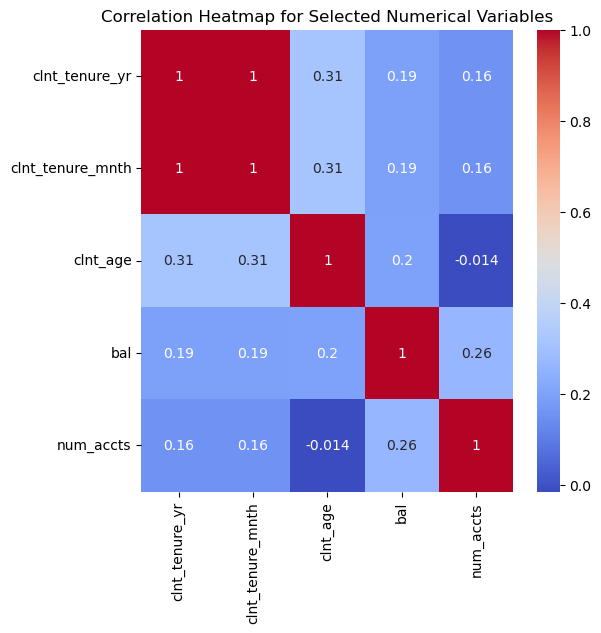

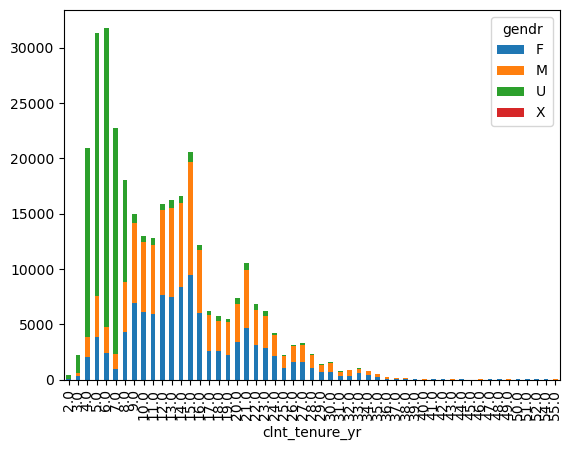

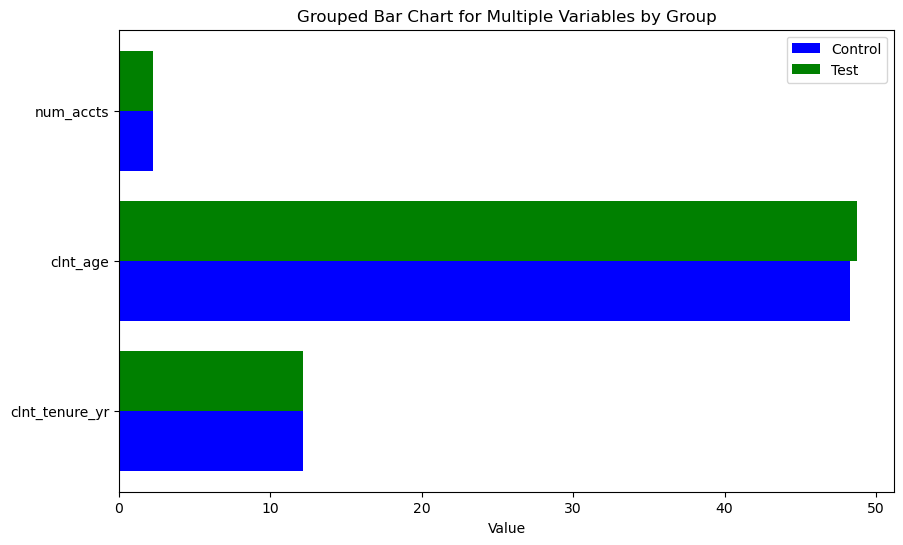

In [2]:
data_demo(merged_df2)

### An overview of the three datasets used: Client Profiles, Digital Footprints, and Experiment Roster.
We have carried out univariate analysis here for both control and test group.

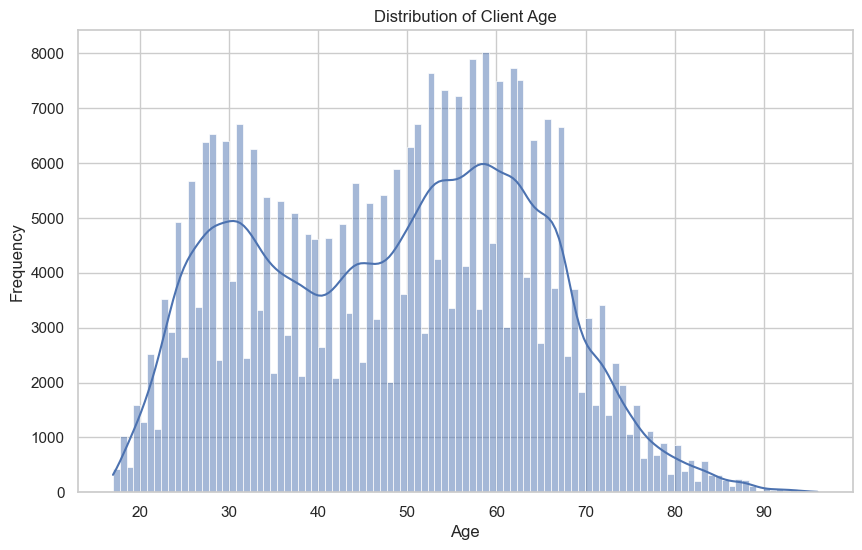

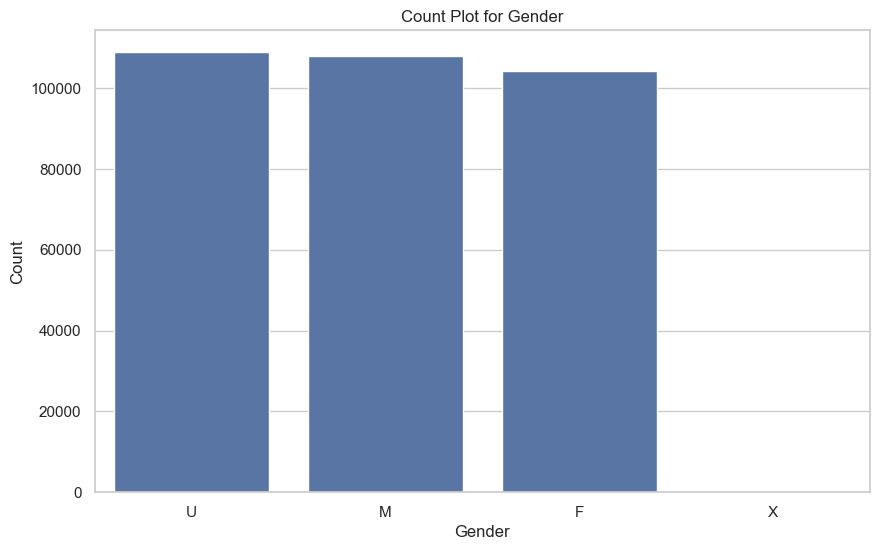

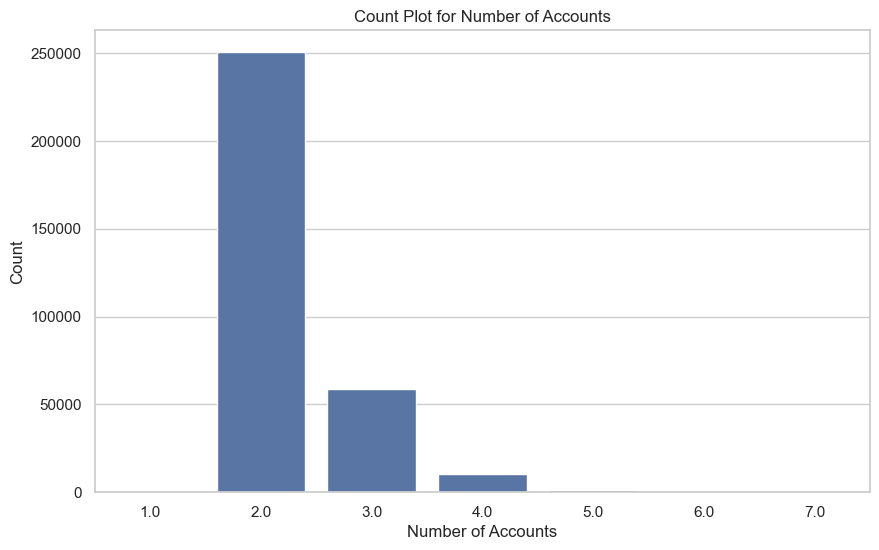

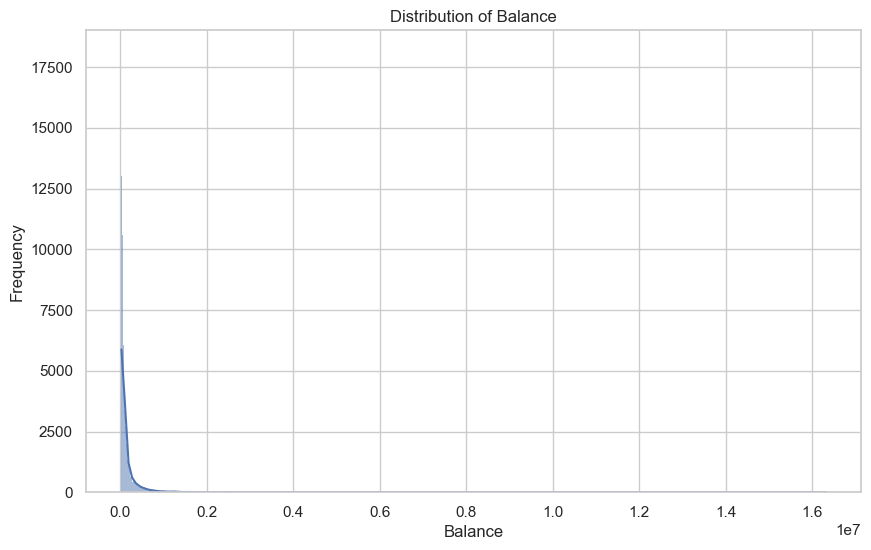

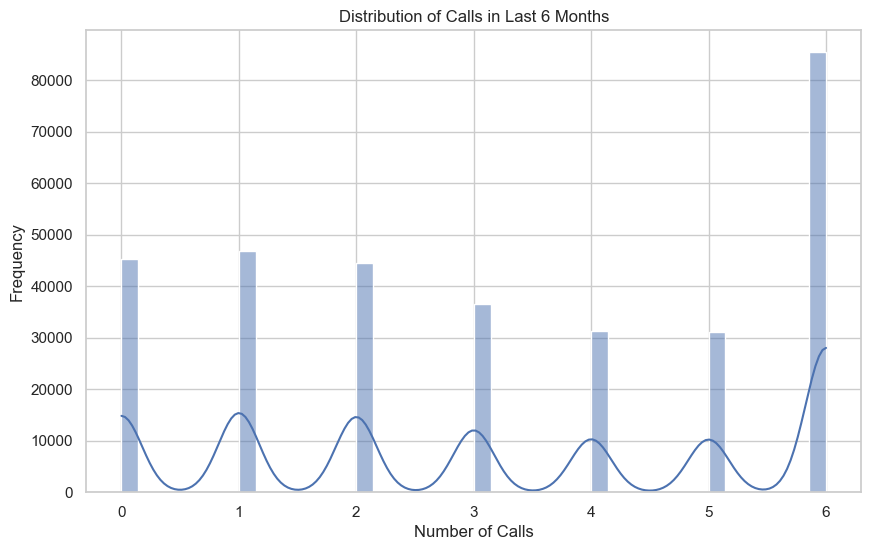

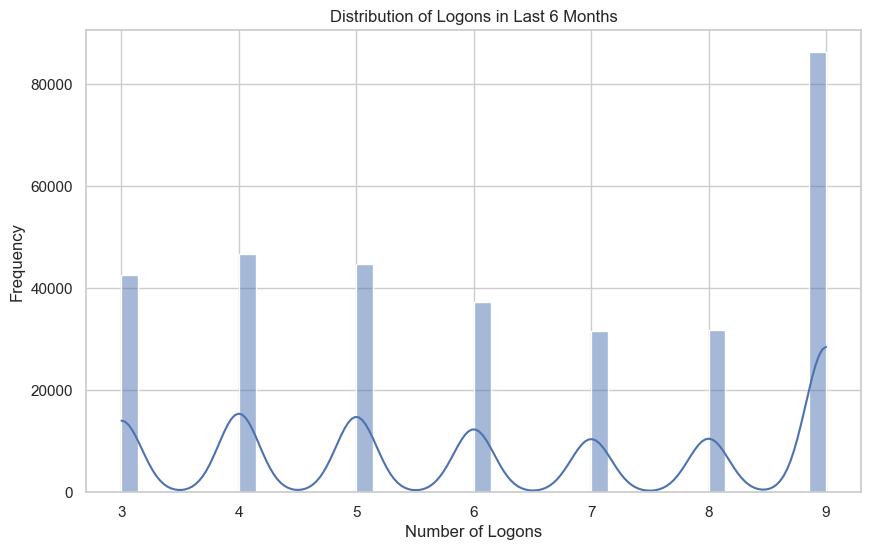

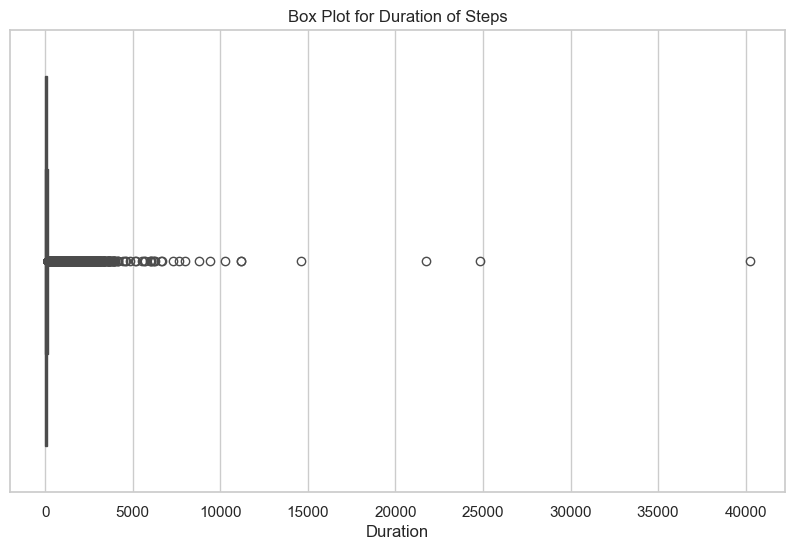

In [3]:
visualize_data(merged_df2)

In [4]:
# Creating two dataframes for control and test showing last step and completed confirm step.
control_df = process_control_data(merged_df2)


In [5]:
# Creating two dataframes for control and test showing last step and completed confirm step.
test_df = process_test_dataframe(merged_df2)
test_df

,client_id,visitor_id,completed,duration,age,clnt_tenure,last_step,completed_numeric
0,555,402506806_56087378777,yes,2.63,29.5,3 years,confirm,1
1,647,66758770_53988066587,yes,6.28,57.5,12 years,confirm,1
2,934,810392784_45004760546,no,NaN,51.0,9 years,None,0
3,1336,920624746_32603333901,yes,137.80,42.0,48 years,confirm,1
4,1346,123474046_4204671056,no,0.05,46.0,14 years,step_3,0
...,...,...,...,...,...,...,...,...
30000,9999626,52633065_71189986073,no,0.13,35.0,9 years,step_1,0
30001,9999729,604429154_69247391147,no,0.25,31.0,10 years,step_1,0
30002,9999729,834634258_21862004160,yes,1.25,31.0,10 years,confirm,1
30003,9999729,843385170_36953471821,no,-1.35,31.0,10 years,step_2,0


### Removing outliers from age column

In [6]:
Q1  = test_df['age'].quantile(.25)
Q3  = test_df['age'].quantile(.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered_test = test_df[(test_df['age'] >= lower_bound) & (test_df['age'] <= upper_bound)]

df_filtered_test['age'].mean().round(2)

Q1  = control_df['age'].quantile(.25)
Q3  = control_df['age'].quantile(.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered_control = control_df[(control_df['age'] >= lower_bound) & (control_df['age'] <= upper_bound)]
df_filtered_control

df_filtered_control['age'].mean().round(2)
df_filtered_test['age'].mean().round(2)

47.65

In [7]:
correlation=test_df['duration'].corr(test_df['completed_numeric'])
correlation

0.12921683072072998

We also tried to explore if duration has a impact on the success rate, for which we calculated correlation.

In [8]:
correlation = test_df['duration'].corr(test_df['completed_numeric'])

# Create a scatter plot with Plotly
fig = px.scatter(
    test_df, x='duration', y='completed_numeric', trendline='ols',
    title=f'Duration vs. Completion Status (Correlation: {correlation:.2f})',
    labels={'duration': 'Duration', 'completed_numeric': 'Completion Status'}
)

# Customize the layout
fig.update_layout(
    xaxis_title="Duration",
    yaxis_title="Completion Status",
    showlegend=False
)

# Show the plot
fig.show()

Insight- A positive correlation coefficient suggests that longer durations are associated with higher success rates.
The p-value indicates whether this correlation is statistically significant (commonly, a p-value < 0.05 is considered significant)

## KPIs

### 1. Completion Rate: The proportion of users who reach the final ‘confirm’ step.


In [9]:
calculate_success_ratio(test_df,control_df)


Success percentage of control group is: 58.02%, Success percentage of test group is: 61.38%


(61.38, 58.02)

### 2. Time Spent on Each Step: The average duration users spend on each step.

In [17]:
# Here we are calculating average duration taken in each step for both control and test group. The first table shows the Test result and the second shows the Control
average_duration(merged_df2)



(  process_step    duration
 0      confirm  128.783625
 1        start  147.168959
 2       step_1   37.716118
 3       step_2   48.135489
 4       step_3   96.851483,
   process_step    duration
 0      confirm  128.646669
 1        start  151.413865
 2       step_1   43.003881
 3       step_2   38.673796
 4       step_3   92.954099)

### 3. Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [ ]:
error_rate(merged_df2)

'Error rate of control group is: 0.04%, Error rate of test group is: 0.06%'


### Hypothesis 1.1 
H0 = Control group success rate = Test group success rate

H1= Control group success rate != Test group success rate
### Hypothesis 1.2
H0 = Control group success rate > Test group success rate 

H1= Control group success rate < Test group success rate

significance level = 0.05

In [ ]:
perform_ttest(control_df, test_df, column='completed_numeric')

T-Statistic: -8.130156856984316
P-Value: 4.3755383431637894e-16
T-Statistic (greater): 8.137324196769077
P-Value (greater): 2.0614046907717007e-16


Interpretation of the Results

1.1 P-Value:  Since the p-value is much lower, (typically ≤ 0.05)it indicates strong evidence against the null hypothesis.So we are rejecting the null hypothesis and conclude that the mean success rate of the test group is significantly different than that of the control group.

1.2 P-Value:  Since the p-value is much lower, (typically ≤ 0.05)it indicates strong evidence against the null hypothesis.So we are rejecting the null hypothesis and conclude that the mean success rate of the test group is significantly greater than that of the control group.

## Hypothesis 2



H0 -The error rate of the test group < control group.

H1- The error rate of the test group > control group.
significance level = 0.05

In [ ]:
error_rate_with_hypothesis_test(merged_df2)

'Error rate of control group is: 0.04%, Error rate of test group is: 0.06%, T-Statistic: 25.9175, P-Value: 0.0000'

Interpretation of the Results

The analysis shows that the error rate increased slightly in the test group compared to the control group (0.06% vs. 0.04%). The very low P-value and high T-statistic suggest that this difference is statistically significant, indicating that the new version introduced in the test group has a meaningful impact on error rates.

Given these results, stakeholders should consider whether the observed increase in error rates in the test group is acceptable or whether further investigation and refinement of the new version are necessary to reduce errors. The statistical significance implies that the increase in error rates is not due to random variation but likely due to changes made in the test group.

## Hypothesis 3


H0 -The average duration for the test group < control group.

H1- The average duration for the test group > control group.

significance level = 0.05

In [ ]:
hypo_3(merged_df2)

/opt/anaconda3/envs/major_project/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


'P-Value: 7.933522970672922e-57'

Interpretation of the Results

Given the extremely small P-value, we reject the null hypothesis (H0). This is because the P-value is far below common significance levels (such as 0.05 or 0.01), suggesting that the observed data is highly unlikely under the null hypothesis.

Acceptance of H1: Since we rejected the null hypothesis, we accept the alternative hypothesis (H1). This means that the average duration for the test group is significantly greater than the average duration for the control group.

### Conclusion

Hypo- 2

Where it signifies, the reasons could be unknown, Insight/Probable reasons-
   1. it could be either to review some information they previously saw, such as product details, specifications, or terms and conditions. 
2. When comparing products, services, or content, users may go back and forth between pages to evaluate their options. 
3. Mismatch in Content: If the content on the page does not meet the user's expectations or is not relevant, they may go back to the previous page to find what they're looking for.
 4. Unclear Page Functionality: If users are unsure about how to interact with a page or complete a task, they might go back to start over or reconsider their actions.If users find the content uninteresting or not engaging, they may simply go back and look for something else. 
 5. Lack of Clear Next Steps: If the next steps are not clearly indicated or if the call-to-action buttons are not prominent, users might go back to seek further guidance. They might go back to explore other options if they are uncertain about their decision.

Hypo- 3

The time spent on the "confirm" step is nearly identical between the control (128.783625 seconds) and test (128.646669 seconds) groups. This indicates that the final confirmation step duration was consistent across both groups, suggesting that whatever changes were tested did not affect the duration of this step.
Initial Interaction (Start Step):

Users in the test group spent slightly more time on the "start" step (151.413865 seconds) compared to the control group (147.168959 seconds). This could suggest that the initial interface or instructions in the test group required more time to understand or navigate. The increase of approximately 4.25 seconds may indicate a slight complexity or additional content in the test version.
Step 1 Interaction:

The average duration for "step_1" increased from 37.716118 seconds in the control group to 43.003881 seconds in the test group, indicating that users spent about 5.29 more seconds on this step in the test group. This could suggest that the test version either had more content or was less intuitive, leading to longer interaction times.
Step 2 Interaction:

There is a notable decrease in the time spent on "step_2" in the test group (38.673796 seconds) compared to the control group (48.135489 seconds), with a reduction of approximately 9.46 seconds. This suggests that users found this step easier or quicker to complete in the test group, possibly due to improved interface design or clearer instructions.
Step 3 Interaction:

Users in the test group spent slightly less time on "step_3" (92.954099 seconds) compared to the control group (96.851483 seconds), a difference of about 3.9 seconds. This indicates a small efficiency improvement in the test group for this step.
Overall Implications
Efficiency: The test group showed slight improvements in steps 2 and 3, suggesting that any changes made to the interface or process in these steps potentially enhanced efficiency. The reduced time indicates users were able to complete these steps more quickly, possibly due to better design, clearer instructions, or fewer obstacles.


Complexity or Engagement: The increased time on the "start" and "step_1" steps in the test group suggests that these changes either made the steps more engaging or added complexity. Further investigation would be needed to determine if this additional time was due to positive engagement (e.g., users spending more time exploring new features) or negative complexity (e.g., users struggling to understand the interface).

Consistency: The similar times for the "confirm" step across both groups indicate that this step was not significantly impacted by the changes tested, maintaining consistency in final confirmation times.

Recommendations
Further Analysis: To fully understand the impact of the changes, additional metrics such as user satisfaction, error rates, and completion rates should be analyzed. User feedback could also provide qualitative insights into the nature of the time differences observed.

Focus on Initial Interaction: Since the "start" and "step_1" durations increased in the test group, it may be beneficial to review these areas for potential improvements to simplify user interaction or clarify instructions.

Highlight Efficiency Gains: The reduction in time for "step_2" and "step_3" suggests improvements that could be emphasized or further refined to enhance user experience.

In conclusion, while the test group demonstrated some efficiency improvements, particularly in later steps, the increase in time during the initial steps warrants a closer examination to ensure the overall user experience is optimized.